# Chapter 14: Time Signatures and Beats

The Measure property ***timeSignature*** can be used to set or get a TimeSignature at the zero offset position

In [1]:
from music21 import *

In [2]:
noteC = note.Note('C4', type='half')
noteD = note.Note('D4', type='quarter')
noteE = note.Note('E4', type='quarter')
noteF = note.Note('F4', type='half')

tsThreeFour = meter.TimeSignature('3/4')

print(tsThreeFour.numerator, '/',  tsThreeFour.denominator)

3 / 4


In [3]:
tsThreeFour.ratioString

'3/4'

let’s create a **Stream** object that uses these notes and the TimeSignature object

In [4]:
stream1 = stream.Stream()

for thisThing in [tsThreeFour, noteC, noteD, noteE, noteF]:
    stream1.append(thisThing)

In [5]:
stream1.show('text')

{0.0} <music21.meter.TimeSignature 3/4>
{0.0} <music21.note.Note C>
{2.0} <music21.note.Note D>
{3.0} <music21.note.Note E>
{4.0} <music21.note.Note F>


Why both the time signature and the first note begin at offset 0.0 in the Stream?

|because by default TimeSignature objects have no length:

In [6]:
tsThreeFour.duration.quarterLength

0.0

The *TimeSignature* object helps the display module known how to divide the Stream into **Measure** objects

In [7]:
stream2 = stream1.makeMeasures()
# create a new Stream from stream1 that has measures
# The makeMeasures command,also set the "TrebleClef" to the clef and "final" to the Barline 
stream2.show('text')

{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.meter.TimeSignature 3/4>
    {0.0} <music21.note.Note C>
    {2.0} <music21.note.Note D>
{3.0} <music21.stream.Measure 2 offset=3.0>
    {0.0} <music21.note.Note E>
    {1.0} <music21.note.Note F>
    {3.0} <music21.bar.Barline type=final>


In [14]:
stream2.show('xml')

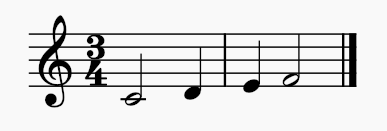

change the display of certain common **duple signatures** by *.symbol*

In [8]:
s = stream.Stream()
ts0 = meter.TimeSignature('4/4')
ts1 = meter.TimeSignature('4/4')
ts1.symbol = 'common'
ts2 = meter.TimeSignature('2/2')
ts3 = meter.TimeSignature('2/2')
ts3.symbol = 'cut'
s.append(ts0)
s.append(note.Note('C5', type='whole'))
s.append(ts1)
s.append(note.Note('B4', type='whole'))
s.append(ts2)
s.append(note.Note('A4', type='whole'))
s.append(ts3)
s.append(note.Note('G4', type='whole'))
s.makeMeasures(inPlace=True)
s.show('xml')

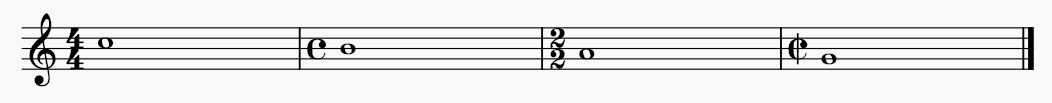

## Working with Beats in TimeSignatures

what beat each **Note** (or Rest or Chord, etc.) is on

In [9]:
stream1.notes[0]

<music21.note.Note C>

In [10]:
stream1.notes[0].beat

1.0

Notice!!!  the first note is on **beat** 1 (represented as 1.0 here). That’s different from its **offset** which is 0.0

In [11]:
for n in stream1.notes:
    print(n, n.beat)

<music21.note.Note C> 1.0
<music21.note.Note D> 3.0
<music21.note.Note E> 1.0
<music21.note.Note F> 2.0


find notes that were on the **downbeat**

In [12]:
for n in stream1.notes:
    if n.beat == 1.0:
        print(n)

<music21.note.Note C>
<music21.note.Note E>


## Working with TimeSignatures in scores

In general, **TimeSignature** objects are found within **Measure** objects inside a **Part** object.

In [13]:
myBach = corpus.parse('bach/bwv57.8')

print(myBach.__class__)

<class 'music21.stream.base.Score'>


We will get the Alto part using the *Score* object's **parts** list

In [14]:
alto = myBach.parts['Alto']

alto

<music21.stream.Part Alto>

In [15]:
alto.show('XML')
# this is one of the few chorales that Bach wrote that is in 3/4

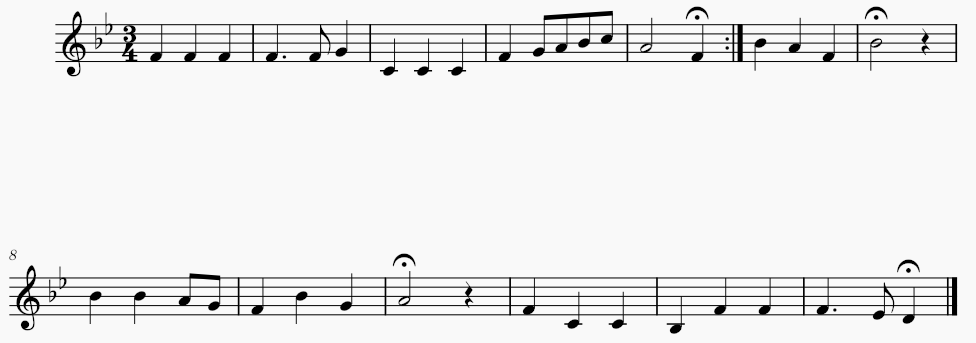

In [16]:
alto.recurse().getElementsByClass(meter.TimeSignature)[0]

<music21.meter.TimeSignature 3/4>

In [17]:
len(alto.recurse().getElementsByClass(meter.TimeSignature))

1

We see that there is exactly one TimeSignatures in the *Part*

In [19]:
alto.measure(1).timeSignature
# look at the first Measure in the Stream, and examine the timeSignature property

<music21.meter.TimeSignature 3/4>

In [20]:
alto.measure(2).timeSignature is None
# Other measures don’t have TimeSignature objects

True

Let’s change that!

In [21]:
alto.measure(7).timeSignature = meter.TimeSignature('6/8')

a **beam**(符杠) is a horizontal or diagonal line used to connect multiple consecutive notes (and occasionally rests)

In [22]:
alto.makeBeams(inPlace=True)

We’ll clear all the stem directions(符杆方向) so that we don’t get really screwy beams

In [24]:
for n in alto.recurse().notes:
    n.stemDirection = None

In [25]:
alto.show('xml')

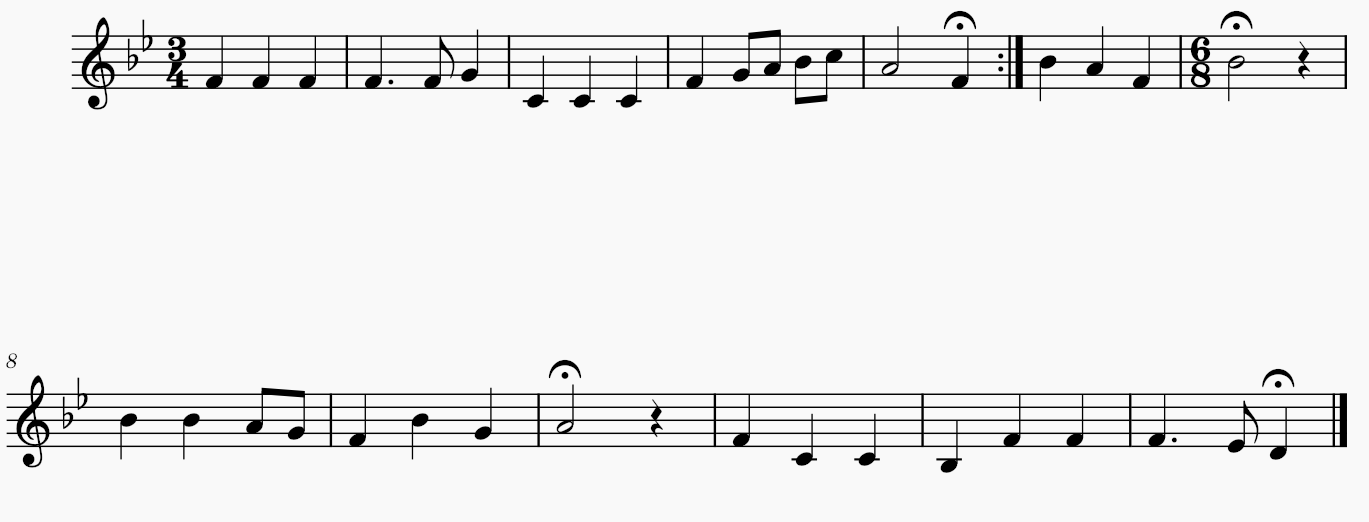

## Working with Beats in a score

Let’s use the ***beatStr*** for “beat string” tag to get a nicely formatted measure of the beat for each note

In [26]:
sopr = myBach.parts['Soprano'].measures(1,2)

for n in sopr.recurse().notes:
    print(n, n.beatStr)

<music21.note.Note B-> 1
<music21.note.Note B-> 2
<music21.note.Note F> 3
<music21.note.Note D> 1
<music21.note.Note C> 2 1/2
<music21.note.Note B-> 3


Let’s put the ***beatStr*** as a lyric on each note

In [27]:
for n in sopr.recurse().notes:
    n.addLyric(n.beatStr)

sopr.show('xml')

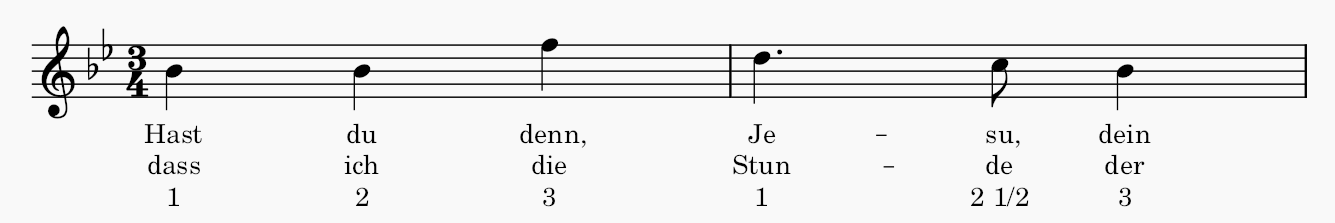

If we change the TimeSignature in a Part, the beat counts will reflect this change

In [28]:
bass = myBach.getElementById('Bass')
newBass = bass.flatten().getElementsNotOfClass(meter.TimeSignature).stream()
newMeasures = newBass.makeMeasures(meter.TimeSignature('6/8'))
newMeasures.makeTies(inPlace=True)
for n in newMeasures.recurse().notesAndRests:
    n.addLyric(n.beatStr)
newMeasures.show('xml')

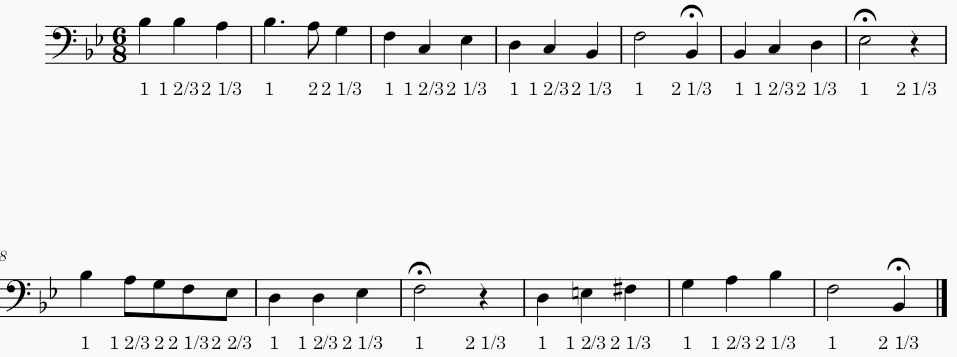

Each note also has a particular ***beatStrength*** that shows how metrically accented music21 thinks it is.

1.0 being most accented and 0 being least

In [29]:
for n in sopr.recurse().notes:
    print(n, n.beatStrength)

<music21.note.Note B-> 1.0
<music21.note.Note B-> 0.5
<music21.note.Note F> 0.5
<music21.note.Note D> 1.0
<music21.note.Note C> 0.25
<music21.note.Note B-> 0.5
